In [2]:
import tensorflow as tf
import pathlib
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pathlib
import tensorflow as tf

# Define the dataset path using pathlib
train_dir = pathlib.Path("./dataset/train")

# Load dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

# Print detected classes
print("Detected Classes:", train_ds.class_names)


# Verify dataset structure
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        print(f"Class '{category}': {len(os.listdir(category_path))} images")

Found 9469 files belonging to 10 classes.
Detected Classes: ['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']
Class 'n01440764': 963 images
Class 'n02102040': 955 images
Class 'n02979186': 993 images
Class 'n03000684': 858 images
Class 'n03028079': 941 images
Class 'n03394916': 956 images
Class 'n03417042': 961 images
Class 'n03425413': 931 images
Class 'n03445777': 951 images
Class 'n03888257': 960 images


In [4]:
# Define dataset path
train_dir = pathlib.Path("./dataset/train")

# Load training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

# Print detected class names
class_names = train_ds.class_names
print("Detected Classes:", class_names)

# Verify dataset structure
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        print(f"Class '{category}': {len(os.listdir(category_path))} images")


Found 9469 files belonging to 10 classes.
Detected Classes: ['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']
Class 'n01440764': 963 images
Class 'n02102040': 955 images
Class 'n02979186': 993 images
Class 'n03000684': 858 images
Class 'n03028079': 941 images
Class 'n03394916': 956 images
Class 'n03417042': 961 images
Class 'n03425413': 931 images
Class 'n03445777': 951 images
Class 'n03888257': 960 images


In [5]:
# Normalize images (rescale pixel values to [0,1])
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (x / 255.0, y)).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)


In [6]:
from tensorflow import keras
from tensorflow.keras import layers

# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(180, 180, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),  # Reduce overfitting
    layers.Dense(len(class_names), activation="softmax")  # Output layer with 10 classes
])

# Compile model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Model summary
model.summary()


C:\Users\AstroDark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,266 (25.36 MB)

 Trainable params: 6,648,266 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train model
epochs = 10  # Adjust as needed
history = model.fit(train_ds, epochs=epochs)

# Save the trained model
model.save("image_classification_model.h5")


Epoch 1/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 100s 322ms/step - accuracy: 0.2447 - loss: 2.0970
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 94s 318ms/step - accuracy: 0.5302 - loss: 1.4323
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 94s 318ms/step - accuracy: 0.6186 - loss: 1.1818
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 95s 321ms/step - accuracy: 0.6851 - loss: 0.9576
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 103s 348ms/step - accuracy: 0.7593 - loss: 0.7396
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 98s 332ms/step - accuracy: 0.8032 - loss: 0.6159
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 96s 326ms/step - accuracy: 0.8402 - loss: 0.4698
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 96s 323ms/step - accuracy: 0.8711 - loss: 0.3710
Epoch 9/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 96s 323ms/step - accuracy: 0.8980 - loss: 0.2996
Epoch 10/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 97s 328ms/step - accuracy: 0.9068 - loss: 0.2721


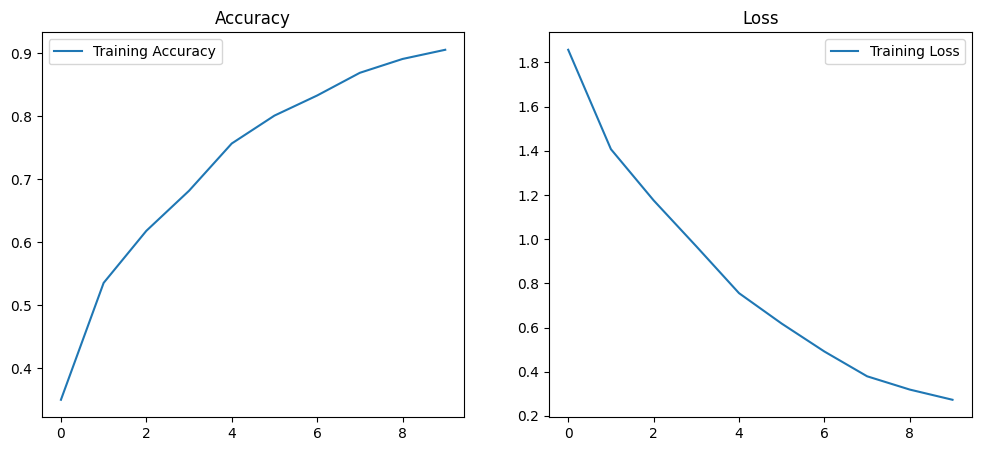

In [8]:
# Plot training accuracy & loss
acc = history.history["accuracy"]
loss = history.history["loss"]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label="Training Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label="Training Loss")
plt.legend()
plt.title("Loss")

plt.show()


Selected Image: M:/Datamites/PRO3/dataset/val/n02979186/n02979186_11.JPEG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Predicted Class: casette_player


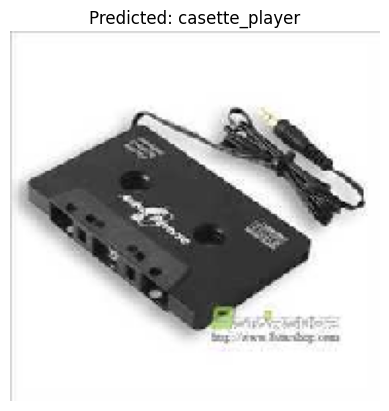

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tkinter import Tk, filedialog

# Open file picker dialog
Tk().withdraw()  # Hide the main Tkinter window
img_path = filedialog.askopenfilename(title="Select an Image", filetypes=[("Image Files", "*.jpg;*.png;*.jpeg")])

if img_path:
    print(f"Selected Image: {img_path}")

    # Load and preprocess the selected image
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

    # Load the trained model
    model = tf.keras.models.load_model("image_classification_model.h5")

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    # Define class names (Update this based on your dataset)
    class_names = ["tench", "springer", "casette_player", "chain_saw", "church",
                   "French_horn", "garbage_truck", "gas_pump", "golf_ball", "parachute"]

    # Print prediction result
    print(f"Predicted Class: {class_names[predicted_class]}")

    # Display image with prediction
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.axis("off")
    plt.show()
else:
    print("No image selected.")
